In [1]:
import math
import numpy as np
import pandas as pd
from numpy import linalg
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')
from IPython.display import Image

#### Norm
- Norm은 벡터의 크기를 측정하는 방법이고, 두 벡터 사이의 거리를 측정하는 방법이다. L1 Norm은 서로 다른 두 벡터를 나타내는 각 원소들의 차이의 절댓값의 합이며, L2 Norm은 서로 다른 두 벡터 사이의 유클리드 거리(직선 거리)를 의미한다.
- 참고 사이트 : https://en.wikipedia.org/wiki/Norm_(mathematics)

$$ L_p = || x ||_p = \big(\sum\limits_i^n|x_i|^p\big)^{\frac{1}{p}} $$ 

#### 두가지 관점(Robustness, Stability)
- Robustness : L1 > L2
    - Robustness is defined as resistance to outliers in a dataset. The more able a model is to ignore extreme values in the data, the more robust it is.
    - The L1 norm is more robust than the L2 norm, for fairly obvious reasons: the L2 norm squares values, so it increases the cost of outliers exponentially; the L1 norm only takes the absolute value, so it considers them linearly.

- Stability : L2 > L1
    - Stability is defined as resistance to horizontal adjustments. This is the perpendicular opposite of robustness.

- L1

In [2]:
# 데이터 만들기.
np.random.seed( 20 )
data = np.random.randint( -5, 6, size=( 2, 2 ) )
df = pd.DataFrame( data )
df

,0,1
0,-2,5
1,5,4


In [3]:
# p=1인 경우, 즉 L1 Norm
linalg.norm( df, ord=1, axis=1 )  #  axis=1(행),  ord=1(L1)

array([7., 9.])

- L2

In [4]:
# 데이터 만들기.
np.random.seed( 20 )
data = np.random.randint( 1, 10, size=( 3, 2 ) )
df = pd.DataFrame( data )
df

,0,1
0,4,5
1,7,8
2,3,1


In [5]:
# p=2인 경우, 즉 L2 Norm
linalg.norm( df, ord=2, axis=1 )  #  axis=1(행),  ord=2(L2)

array([ 6.40312424, 10.63014581,  3.16227766])

In [6]:
np.sqrt( 4**2 + 5**2 )

6.4031242374328485

In [7]:
np.sqrt( 7**2 + 8**2 )

10.63014581273465

In [8]:
np.sqrt( 3**2 + 1**2 )

3.1622776601683795

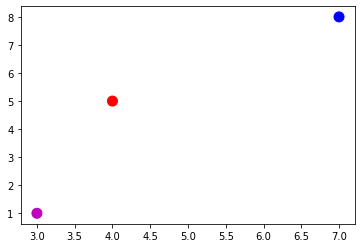

In [9]:
plt.scatter( df[0], df[1], s=100, c=['r','b','m'] ) ; plt.show()

#### Cost function

In [10]:
x_data = np.array( [1,2,3] )
y_data = np.array( [1,2,3] )

In [11]:
w    = 0
n    = len( x_data )
hy   = w*x_data
loss = np.sum( (hy - y_data)**2 / n )
loss

4.666666666666666

In [12]:
def cost( x, y, w ):
    n    = len( x )
    hy   = w*x
    loss = np.sum( (hy - y)**2 ) / n 
    return loss

In [13]:
print( cost( x_data, y_data, 0 ) )
print( cost( x_data, y_data, 1 ) )
print( cost( x_data, y_data, 2 ) )

4.666666666666667
0.0
4.666666666666667


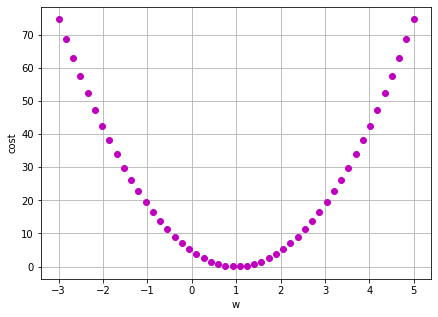

In [19]:
plt.figure( figsize=(7, 5) )
plt.xlabel( 'w' ); plt.ylabel( 'cost' )
for w in np.linspace( -3, 5, 50 ):
    c = cost( x_data, y_data, w )
    plt.plot( w, c, 'mo')
plt.grid()
plt.show()

In [15]:
# L1 크기 함수.
def cost_L1norm( x, y, w, a ):
    n    = len( x )
    hy   = w*x
    loss = np.sum( (hy - y)**2 ) / n + a*abs(w)   # L1 norm , math.fabs(w) = abs(w)
    return loss

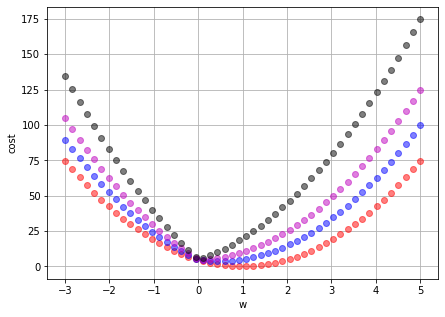

In [16]:
plt.figure( figsize=(7, 5) )
plt.xlabel( 'w' ); plt.ylabel( 'cost' )
for w in np.linspace( -3, 5, 50 ):
    c = cost_L1norm( x_data, y_data, w, a=0 )
    plt.plot( w, c, 'ro', alpha=0.5)
    c = cost_L1norm( x_data, y_data, w, a=5 )
    plt.plot( w, c, 'bo', alpha=0.5)
    c = cost_L1norm( x_data, y_data, w, a=10 )
    plt.plot( w, c, 'mo', alpha=0.5)
    c = cost_L1norm( x_data, y_data, w, a=20 )
    plt.plot( w, c, 'ko', alpha=0.5)
plt.grid()
plt.show()

In [17]:
# L2 크기 함수.
def cost_L2norm( x, y, w, a ):
    n    = len( x )
    hy   = w*x
    loss = np.sum( (hy - y)**2 ) / n + a*(w**2)   # L2 norm 
    return loss

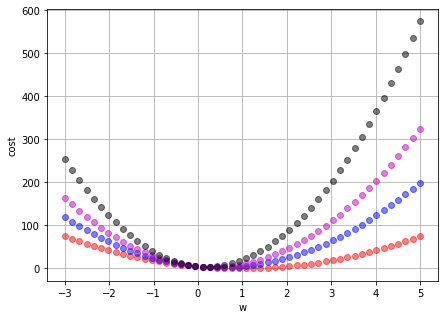

In [18]:
plt.figure( figsize=(7, 5) )
plt.xlabel( 'w' ); plt.ylabel( 'cost' )
for w in np.linspace( -3, 5, 50 ):
    c = cost_L2norm( x_data, y_data, w, a=0 )
    plt.plot( w, c, 'ro', alpha=0.5)
    c = cost_L2norm( x_data, y_data, w, a=5 )
    plt.plot( w, c, 'bo', alpha=0.5)
    c = cost_L2norm( x_data, y_data, w, a=10 )
    plt.plot( w, c, 'mo', alpha=0.5)
    c = cost_L2norm( x_data, y_data, w, a=20 )
    plt.plot( w, c, 'ko', alpha=0.5)
plt.grid()
plt.show()

Result : a가 커질수록 w는 0에 근접한다. 즉, 기울기가 0이라는 의미는 해당 특성데이터(예측변수)를 예측시 무시해도 됨.